<a href="https://colab.research.google.com/github/obaidur2020/Data-Science/blob/master/Heart_Arrhythmia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
url='https://raw.githubusercontent.com/obaidur2020/Data-Science/master/Arrhythmia1.csv'
df = pd.read_csv(url)
df.head()

,Record no,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST
0,1,75,0,190,80,91,193,371,174,121,-16,13,64,-2
1,2,56,1,165,64,81,174,401,149,39,25,37,-17,31
2,3,54,0,172,95,138,163,386,185,102,96,34,70,66
3,4,55,0,175,94,100,202,380,179,143,28,11,-5,20
4,5,75,0,190,80,88,181,360,177,103,-16,13,61,3


In [ ]:
df.tail()

,Record no,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST
447,448,53,1,160,70,80,199,382,154,117,-37,4,40,-27
448,449,37,0,190,85,100,137,361,201,73,86,66,52,79
449,450,36,0,166,68,108,176,365,194,116,-85,-19,-61,-70
450,451,32,1,155,55,93,106,386,218,63,54,29,-22,43
451,452,78,1,160,70,79,127,364,138,78,28,79,52,47


In [ ]:
df.shape 

(452, 14)

In [ ]:
df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
Record no,452.0,226.500000,130.625419,1.0,113.75,226.5,339.25,452.0
Age,452.0,46.471239,16.466631,0.0,36.00,47.0,58.00,83.0
Sex,452.0,0.550885,0.497955,0.0,0.00,1.0,1.00,1.0
Height,452.0,166.188053,37.170340,105.0,160.00,164.0,170.00,780.0
Weight,452.0,68.170354,16.590803,6.0,59.00,68.0,79.00,176.0


In [ ]:
df.describe()

,Record no,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991
std,130.625419,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434
min,1.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000
25%,113.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000
50%,226.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000
75%,339.250000,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000
max,452.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Record no     452 non-null    int64 
 1   Age           452 non-null    int64 
 2   Sex           452 non-null    int64 
 3   Height        452 non-null    int64 
 4   Weight        452 non-null    int64 
 5   QRS duration  452 non-null    int64 
 6   P-R interval  452 non-null    int64 
 7   Q-T interval  452 non-null    int64 
 8   T interval    452 non-null    int64 
 9   P interval    452 non-null    int64 
 10  QRS           452 non-null    int64 
 11  T             452 non-null    object
 12  P             452 non-null    object
 13  QRST          452 non-null    object
dtypes: int64(11), object(3)
memory usage: 49.6+ KB


In [ ]:
#Let's see how many missing data we have and replace them with NaN's:
count=0
for i in range(0,452):
    for j in range(0,14):
        if (df.iloc[i,j]=='?'):
            count =count+1
print(count)
data = df.replace('?', np.NaN)

31


Text(0, 0.5, 'Count of NaN')

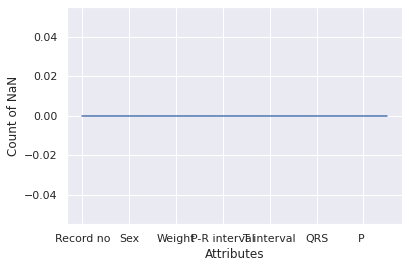

In [ ]:
#Now let's see the distribution of our missing data: 
pd.isnull(df).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0, 0.5, 'Count of NaN')

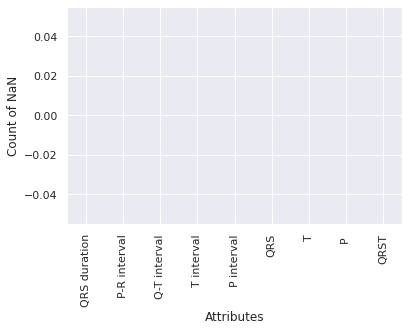

In [ ]:
#zooming in :
pd.isnull(df).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [ ]:
#Adding column names
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate"]

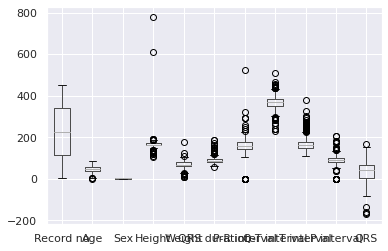

In [ ]:
df.boxplot( )

In [ ]:
df['Age'].unique()

array([75, 56, 54, 55, 13, 40, 49, 44, 50, 62, 45, 30, 47, 46, 73, 57, 28,
       36, 34, 31, 51, 53, 58, 52, 69, 35, 43, 41, 39, 24, 72, 38, 42, 32,
        1, 27, 48, 26, 64, 37, 71, 79, 63, 19, 68, 25, 33, 17,  9, 29, 74,
       61, 18, 60, 59, 66, 65, 22, 21, 70, 11, 77, 83, 67, 80, 15,  7, 12,
       14,  0,  3, 20, 81,  8, 78, 16, 76])

In [ ]:
df.Age.value_counts().sort_index()

0     1
1     2
3     1
7     3
8     2
     ..
78    2
79    1
80    2
81    1
83    1
Name: Age, Length: 77, dtype: int64

In [ ]:
conditions = [
(df['Age'] >= 2),
(df['Age'] <= 1)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating)
fpie=df.rating.value_counts()
df.rating.value_counts()

good    449
bad       3
Name: rating, dtype: int64

ValueError: ignored

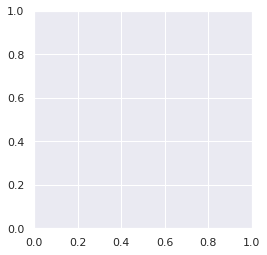

In [ ]:
pi_plot=df.Age.value_counts().sort_index()
plt.pie(pi_plot, labels=['1', '1', '2', '1', '2'], colors=['yellow', 'lightcoral', 'coral', 'red', 'green'],
autopct='%.2f%%')
plt.show()

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

## Data science

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

# New section

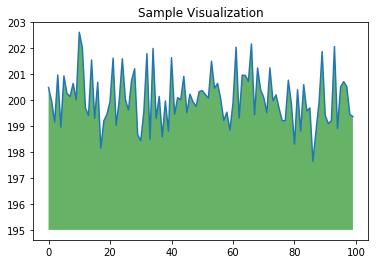

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

## More resources

### Working with notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with data
- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine learning crash course
These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [TensorFlow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine learning examples

To see end-to-end examples of the interactive machine-learning analyses that Colaboratory makes possible, take a look at these tutorials using models from <a href="https://tfhub.dev">TensorFlow Hub</a>.

A few featured examples:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
